In [321]:
import io2, os, sys, oechem
import algo.krr as krr 
import io2.gaussian as iog
import representation.slatm_x as sl

import aqml.cheminfo.molecule.nbody as by
import aqml.cheminfo.molecule.geometry as cmg
import aqml.cheminfo.core as cc
import algo.qml as aqml
reload(aqml)

T,F = True,False

def glc(w0, ipt, p='energy'):
    ots = ipt.split(',')

    if p in ['energy']:
        unit = 'h'
    else:
        # 'lmp2vtz' #'tpssdef2tzvp'
        unit = 'kcal'

    no = len(ots)
    wds  = []
    wds += ots[0].split('+')
    rcut = 2.7
    if no == 1:
        wds += ['target/']
    elif no == 2:
        wds += [ots[1]]
    elif no == 3:
        wds += [ots[1]]; rcut = eval(ots[2])

    print('wds=',wds)
    fs = []; n2 = 0
    for _wd in wds:
        wd = _wd if _wd[-1] != '/' else _wd
        print('_wd=',_wd)
        if not os.path.exists(w0+wd):
            try:
                wd += '_extl/'
                assert os.path.exists(w0+wd)
            except:
                raise Exception('#ERROR: either %s or %s does not exist'%(w0+_wd, w0+wd))
        fsi = io2.commandOut('ls %s/%s/*.xyz'%(w0,wd))
        assert len(fsi) > 0
        fs += fsi
        if (wd in ['.','./']) or ('target' in wd):
            print('##')
            n2 += len(fsi)

    xp = {'coeffs':[1.0]}
    namax = 9 # 8 #7
    #n2 = 1
    obj = aqml.qml(fs, n2=n2, fitmorse=F, property_names=[p], iae=F, \
                   xparam=xp, rcut=rcut, unit=unit, no_strain=F, prog='orca',\
                   check_boundary=F)
    #obj.test_target(fmap=wds[0]+'map.pkl', llambdas=[1e-2, 1e-4, 1e-8])
    obj.test_target(fmap=w0+wds[0]+'/map.pkl', izeff=F, icg=F, cab=F, namax=namax, llambdas=[1e-2, 1e-4, 1e-8])
    return obj

def str2l(s0):
    _s1 = s0.split('\n')
    s1 = []
    for si in _s1:
        if si.strip() not in s1: s1.append(si.strip())
    return s1

In [21]:
w0 = 'N-conj-ring/'
ipt = 'g8raf,target,4.8'
obj = glc(pdr, ipt)

i= 1
nzs =  (26, 3) zsu= [1 6 7]
--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     131.2373     131.2373     131.2373
     5       8.8118       8.8118       8.8118
     9      11.3551      11.3551      11.3551
    17       0.9458       0.9458       0.9458
    22       2.7024       2.7024       2.7024
    24       0.7305       0.7305       0.7305
    25       0.1831       0.1831       0.1831
    25       0.1831       0.1831       0.1831
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     131.2373     131.2373     131.2373
     5      10.5074      10.5074      10.5074
     9       9.3152       9.3152       9.3152
    17      -2.0840       2.0840      -2.0840
    22       2.0938       2.0938       2.0938
    24      -0.0586       0.0586      -0.0586
    25      -0.1074       0.1074      -0.1074
    25      -0.1074       0.1074      -0.1074
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     131.2373     131.23

--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     128.7072     128.7072     128.7072
     5      11.6701      11.6701      11.6701
    10      10.9738      10.9738      10.9738
    18       4.1715       4.1715       4.1715
    21       4.3940       4.3940       4.3940
    26       0.5830       0.5830       0.5830
    27       0.4873       0.4873       0.4873
    27       0.4873       0.4873       0.4873
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     128.7072     128.7072     128.7072
     5      14.1426      14.1426      14.1426
    10       9.2610       9.2610       9.2610
    18       0.8653       0.8653       0.8653
    21       0.4199       0.4199       0.4199
    26       0.1278       0.1278       0.1278
    27       0.0093       0.0093       0.0093
    27       0.0093       0.0093       0.0093
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     128.7072     128.7072     128.7072
     5      14.17

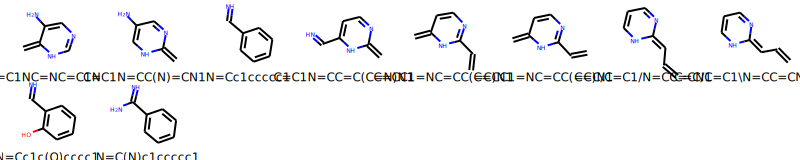

In [7]:
w0 = 'N-conj-ring/'
fs = io2.commandOut('ls %s/target/f*f'%w0)
reload(cdc)
cdc.draw_rdkit().viewms(fs, wlgd_text='smiles') #'id')

In [24]:
printa( np.array(obj.maes['1,0']) )

[[   nan 131.24  10.51   9.32  -2.08   2.09  -0.06  -0.11  -0.11]
 [   nan 123.45   7.89   5.72  -2.5    0.38  -0.74  -0.12  -0.12]
 [   nan    nan    nan  10.01  10.01   3.32   3.32   0.04   0.04]
 [   nan 127.26   7.32  10.82  -2.9   -2.29   0.43   0.46   0.46]
 [   nan 131.66   8.97   6.5   -1.82  -3.27  -0.37  -0.32  -0.32]
 [   nan 131.88   9.39   8.03  -3.95  -3.85  -0.78  -0.7   -0.7 ]
 [   nan 128.42  13.86   7.68   1.28  -0.98   0.57   0.37   0.37]
 [   nan 128.71  14.14   9.26   0.87   0.42   0.13   0.01   0.01]
 [   nan    nan  50.68  10.3   12.48   3.57   2.33   1.26   1.26]
 [   nan 145.6   34.69  10.08  12.18   1.75   2.42   0.01   0.01]]


**The Molecule which needs amons with N_I=8**

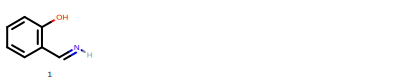

In [4]:
cdc.draw_oechem().viewms([fs[-2]], wlgd_text='id') #, molSize=(30,30))

In [13]:
reload(coo)

mols = [ coo.StringM(f) for f in fs ]
ars = [ mi.mesomeric_ar for mi in mols ]
for i,fi in enumerate(fs):
    if ars[i]: print(i+1, fi, 'iar=T')
#print( dict(zip(range(1,len(fs)+1), ars)) )

9 N-conj-ring//target/frag_205_c00001.sdf iar=T


In [18]:
reload(coo)

ss1 = ['C=c1ccccc1=C', 'C=c1ccccc1=CO']
mols = [ coo.StringM(si) for si in ss1 ]
ars = [ mi.mesomeric_ar for mi in mols ]
for i,si in enumerate(ss1):
    if ars[i]: print(i+1, si, 'iar=T')
#print( dict(zip(range(1,len(fs)+1), ars)) )

1 C=c1ccccc1=C iar=T
2 C=c1ccccc1=CO iar=T


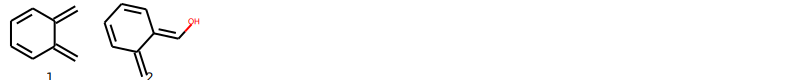

In [19]:
cdc.draw_rdkit().viewms(ss1, wlgd_text='id') #, molSize=(30,30))

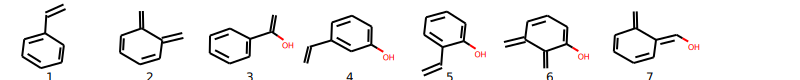

In [21]:
w0 = 'PhR/set.1/'
fs = io2.commandOut('ls %s/target/f*f'%w0)
reload(cdc)
cdc.draw_rdkit().viewms(fs, wlgd_text='id') #, molSize=(30,30))

In [12]:
ipt = 'g8raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (13, 2) zsu= [1 6]
--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     3      16.3916      16.3916      16.3916
     3      16.3916      16.3916      16.3916
    11       1.6208       1.6208       1.6208
    11       1.6208       1.6208       1.6208
    12       0.1326       0.1326       0.1326
    12       0.1326       0.1326       0.1326
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     3       9.5188       9.5188       9.5188
     3       9.5188       9.5188       9.5188
    11       2.5668       2.5668       2.5668
    11       2.5668       2.5668       2.5668
    12       0.0038       0.0038       0.0038
    12       0.0038       0.0038       0.0038
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     3       9.3924       9.3924       9.3924
     3       9.3924    

In [13]:
printa( np.array(obj.maes['1,0']) )

[[  nan   nan   nan  9.52  9.52  2.57  2.57  0.    0.  ]
 [  nan   nan   nan -5.62 -5.62 -1.12 -1.12 -0.   -0.  ]
 [  nan   nan 49.48 11.   13.7   2.08  2.41  0.39  0.39]
 [  nan   nan 49.45 11.57 11.84  5.63  2.95  0.4   0.4 ]
 [  nan   nan 49.05 11.51 14.6   5.75  4.13  1.66  1.66]
 [  nan   nan 27.49 -2.8  -5.26 -0.74 -0.73  0.05  0.05]
 [  nan   nan 24.58 -5.55 -4.85 -2.49 -3.47 -0.88 -0.88]]


**The Molecule which needs amons with N_I=8**

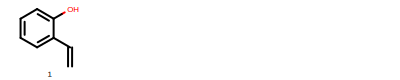

In [23]:
cdc.draw_oechem().viewms([fs[-3]], wlgd_text='id') #, molSize=(30,30))

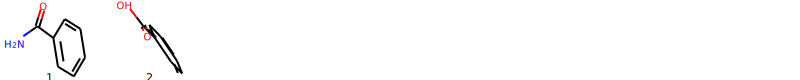

In [24]:
w0 = 'PhR/set.2/'
fs = io2.commandOut('ls %s/target/f*f'%w0)
cdc.draw_rdkit().viewms(fs, wlgd_text='id')

In [8]:
ipt = 'g8raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (30, 4) zsu= [1 6 7 8]
--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     5       8.9516       8.9516       8.9516
     9      19.5015      19.5015      19.5015
    13      19.4039      19.4039      19.4039
    21       0.3218       0.3218       0.3218
    28       1.0368       1.0368       1.0368
    29      -0.1525       0.1525      -0.1525
    29      -0.1525       0.1525      -0.1525
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     5      10.2541      10.2541      10.2541
     9       9.7554       9.7554       9.7554
    13      10.5663      10.5663      10.5663
    21       0.6962       0.6962       0.6962
    28       1.5330       1.5330       1.5330
    29       0.1960       0.1960       0.1960
    29       0.1960       0.1960       0.1960
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(n

In [9]:
printa( np.array(obj.maes['1,0']) )

[[   nan    nan  10.25   9.76  10.57   0.7    1.53   0.2    0.2 ]
 [   nan 166.7   56.03  16.08  17.51   2.56   1.97   0.47   0.47]]


## Single substitutes: R = -NO2, -CN2, -COOH, -CONH2, -COCl

In [51]:
reload(coo)
mols = [ coo.StringM(si) for si in fs ]
#ars = [ mi.mesomeric_ar for mi in mols ]
#for i,si in enumerate(ss1):
#    if ars[i]: print(i+1, si, 'iar=T')
m1 = mols[1].oem
#for ai in m1.GetAtoms(): print( oechem.OEGetHybridization(ai) ) #ai.GetHyb() )

In [53]:
w0 = 'PhR-2/'
ipt = 'g8raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (8, 4) zsu= [1 6 7 8]
--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than

--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     5      46.7311      46.7311      46.7311
     6      26.9470      26.9470      26.9470
     9      27.1946      27.1946      27.1946
    10       2.1343       2.1343       2.1343
    13       2.1427       2.1427       2.1427
    13       2.1427       2.1427       2.1427
    13       2.1427       2.1427       2.1427
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     5      46.8665      46.8665      46.8665
     6      26.6681      26.6681      26.6681
     9      21.5906      21.5906      21.5906
    10       2.5471       2.5471       2.5471
    13       1.1679       1.1679       1.1679
    13       1.1679       1.1679       1.1679
    13       1.1679       1.1679       1.1679
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     5      46.8680      46.8

In [54]:
printa( np.array(obj.maes['1,0']) )

[[    nan     nan     nan     nan     nan     nan     nan     nan     nan]
 [    nan  166.72   55.98   15.55   16.51    3.32    2.42    0.12    0.12]
 [    nan     nan     nan   15.23   11.71    2.13    2.48    1.      1.  ]
 [    nan     nan   10.27    9.79   10.43    1.13    1.75    0.3     0.3 ]
 [    nan     nan     nan    9.68    8.7     2.48    2.76    2.76    2.76]
 [    nan     nan     nan    9.27    9.27    1.86    1.86    0.19    0.19]
 [    nan     nan   36.66   33.87   31.41    2.06    1.07    1.07    1.07]
 [    nan     nan   46.87   26.67   21.59    2.55    1.17    1.17    1.17]
 [    nan     nan     nan   27.6    27.6     0.83    0.83   -0.01   -0.01]
 [    nan  121.15   93.27   21.7    21.02    0.63    0.49   -0.23   -0.23]
 [    nan     nan     nan   38.01   37.92    2.99    2.      1.27    1.27]
 [    nan     nan -182.76   23.26   28.62    1.41    1.54    0.14    0.14]]


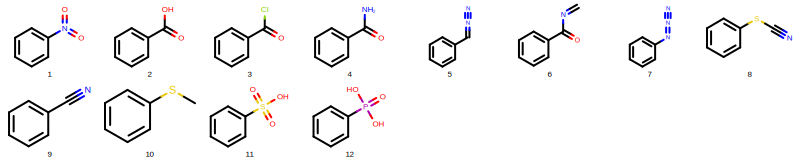

In [101]:
w0 = 'PhR-2/'
fs = io2.commandOut('ls %s/target/f*f'%w0)
reload(cdc)
cdc.draw_oechem().viewms(fs, wlgd_text='id')

In [126]:
reload(coo)
ms = [ coo.StringM(si) for si in fs ]
for i in range(len(fs)):
    if ms[i].is_highly_conjugated:
        print(i+1, fs[i])

1 PhR-2//target/frag_01.sdf
3 PhR-2//target/frag_03.sdf
5 PhR-2//target/frag_05.sdf
6 PhR-2//target/frag_06.sdf
7 PhR-2//target/frag_07.sdf
8 PhR-2//target/frag_08.sdf
9 PhR-2//target/frag_09.sdf


In [169]:
#cdc.draw_imol().viewms(fs[:6]) #, wlgd_text='id') #, molSize=(30,30))

In [166]:
reload(coo)
ss2 = ['C=c1ccccc1=CO', 'C=c1ccccc1=C', 'c1ccccc1', 'C=Cc1ccccc1O']
o1 = [coo.StringM(si) for si in ss2]

In [167]:
for oi in o1: print(oi.is_highly_conjugated)

False
False
True
True


RDKit WARNING: [22:03:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [22:03:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [22:03:34] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [22:03:34] Warning: molecule is tagged as 3D, but all Z coords are zero


## Double substitutes: R1/R2 = -NO2, -CN2, -COOH, -CONH2, -COCl

In [170]:
w0 = 'PhR2/'
ipt = 'g8raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (34, 3) zsu= [1 6 7]
--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     159.8568     159.8568     159.8568
     5      18.6321      18.6321      18.6321
    12      15.9087      15.9087      15.9087
    18       8.3358       8.3358       8.3358
    26       6.8823       6.8823       6.8823
    32       3.3806       3.3806       3.3806
    33       1.6459       1.6459       1.6459
    33       1.6459       1.6459       1.6459
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     159.8568     159.8568     159.8568
     5      17.7323      17.7323      17.7323
    12      12.1905      12.1905      12.1905
    18       7.1472       7.1472       7.1472
    26       6.9578       6.9578       6.9578
    32       1.9402       1.9402       1.9402
    33       0.3988       0.3988       0.3988
    33       0.3988       0.3988       0.3988
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     159.8568     159.85

In [171]:
printa( np.array(obj.maes['1,0']) )

[[   nan 159.86  17.73  12.19   7.15   6.96   1.94   0.4    0.4 ]
 [   nan 159.34 122.62  -1.5    6.29   8.25   6.33   1.07   1.07]
 [   nan    nan  49.12  11.34  14.56   6.06   4.54   1.12   1.12]
 [   nan    nan  24.57  -5.42  -4.2   -2.1   -3.6   -0.65  -0.65]
 [   nan    nan    nan  -5.63  -5.63  -1.11  -1.11  -0.    -0.  ]]


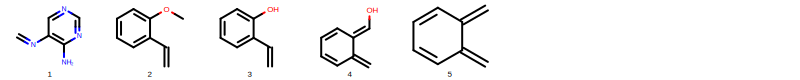

In [262]:
w0 = 'PhR2/'
fs1 = io2.commandOut('ls %s/target/f*f'%w0)
reload(cdc)
cdc.draw_oechem().viewms(fs1, wlgd_text='id')

In [264]:
reload(coo)
for i,fi in enumerate(fs1):
    o1 = coo.StringM(fs1[i])
    if o1.is_conj_amon: #resonated, o1.iconjs
        print(i+1,fi)

RDKit WARNING: [17:15:05] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:15:05] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:15:05] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:15:05] Warning: molecule is tagged as 3D, but all Z coords are zero


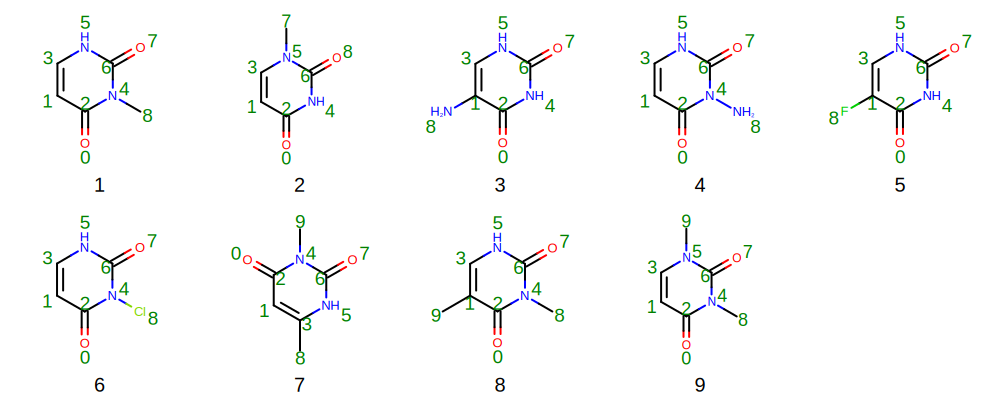

In [257]:
#fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/1by1/04/g9raf/non-planar/f*f')#
#fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/1by1/04/g9raf/frag_2[6-9]*f')
_fst = io2.commandOut('ls ~/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/isomer-ni7acc/frag_*f')
#cdc.draw_rdkit().viewms(_fst, nmr=4, molSize=(200,200), wlgd_text='id')
fst = [ _fst[ix-1] for ix in [3,4,5,7,14,17,21,22,24] ]
reload(cdc)
cdc.draw_oechem().viewms(fst, wlgd_text='id', nmr=5, molSize=(200,200), wia=T )
#cdc.draw_imol().viewms(fst) #, nmr=4, molSize=(200,200), wlgd_text='id')

In [261]:
reload(coo)
for i,fi in enumerate(fst):
    fi2 = fi.split('/')[-1]
    o1 = coo.StringM(fst[i])
    if o1.is_highly_conjugated: print(i+1,fi2, o1.iconjs)
    #print(i+1,fi2, o1.iconjs, o1.hybs, o1.aromatic.astype(int))

1 frag_02_iso3.sdf [1 1 1 1 1 1 1 1 3]
2 frag_02.sdf [1 1 1 1 1 1 1 3 1]
3 frag_04_iso1.sdf [1 1 1 1 1 1 1 1 2]
4 frag_04_iso3.sdf [1 1 1 1 1 1 1 1 2]
5 frag_06_iso2.sdf [1 1 1 1 1 1 1 1 2]
6 frag_07_iso1.sdf [1 1 1 1 1 1 1 1 2]


RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:06:40] Warning: molecule is tagged as 3D, but all Z coords are zero


In [237]:
_s1 = """CCN(C=C)C(=O)N
CC(N(C=C)C=O)O
CC(N(C=C)C(=O)N)O
C=CN(CO)C(=O)N
"""
#ss1 = str2l(_s1)
#cdc.draw_rdkit().viewms(ss1, wlgd_text='id', nmr=5, molSize=(200,200) )


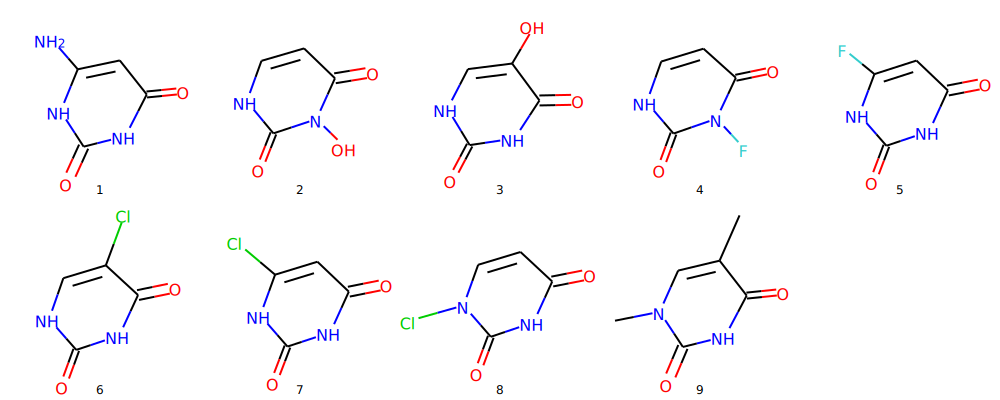

In [222]:
fst = [ _fst[ix-1] for ix in [6,9,10,13,15,18,19,20,23] ]
cdc.draw_rdkit().viewms(fst, wlgd_text='id', nmr=5, molSize=(200,200) )


In [519]:
fst = io2.commandOut('ls ~/amons-paper-db/dna-base/pairs/xtb/target/*sdf')
cdc.draw_imol().viewms(fst) #, nmr=4, molSize=(200,200), wlgd_text='id')

In [520]:
fst

['/home/bing/amons-paper-db/dna-base/pairs/xtb/target/AT.sdf',
 '/home/bing/amons-paper-db/dna-base/pairs/xtb/target/GC.sdf']

In [368]:
ihbd, ihba

([[0], [3], [9], [14]], [[2], [5], [11], [14], [15], [17]])

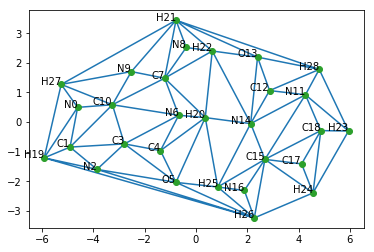

In [461]:
from scipy.spatial import Delaunay

points = o1.coords[:,:2]
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')

for j, p in enumerate(points):
    plt.text(p[0], p[1], '%s%d'%(o1.symbols[j],j), ha='right')

plt.show()


In [462]:
tri = Delaunay(o1.coords)

In [467]:
for sim in tri.simplices.copy():
    if set([5,25]) <= set(sim): 
        sim.sort()
        print('simplice=', sim )

simplice= [ 5 14 15 25]
simplice= [ 5 15 25 26]
simplice= [ 5  8 20 25]
simplice= [ 5 14 20 25]


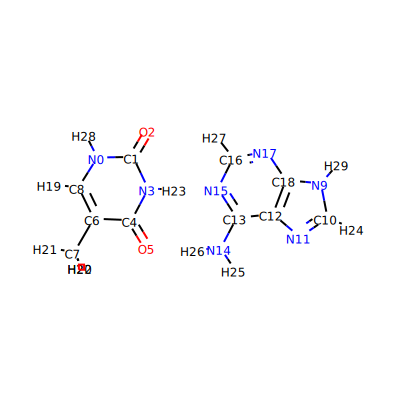

In [511]:
cdc.draw_rdkit().viewm(fst[0], woH=F, molSize=(400,400) ) #, wlgd_text='id')

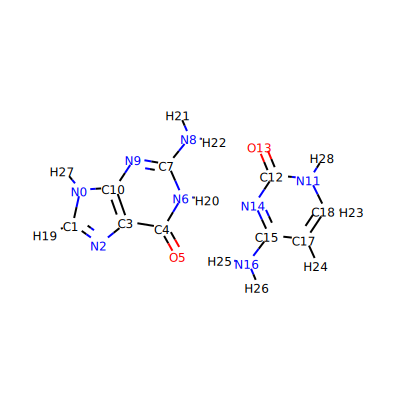

In [516]:
cdc.draw_rdkit().viewm(fst[1], woH=F, molSize=(400,400) ) #, wlgd_text='id')

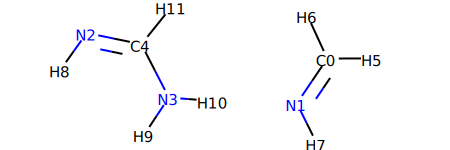

In [550]:
cdc.draw_rdkit().viewm(fst[0], woH=F)

In [552]:
reload(coo)
for i,f in enumerate(fst):
    m = coo.StringM(f)
    if len(m.ncbs_inter) == 2: print(i+1, f.split('/')[-1], m.ncbs)

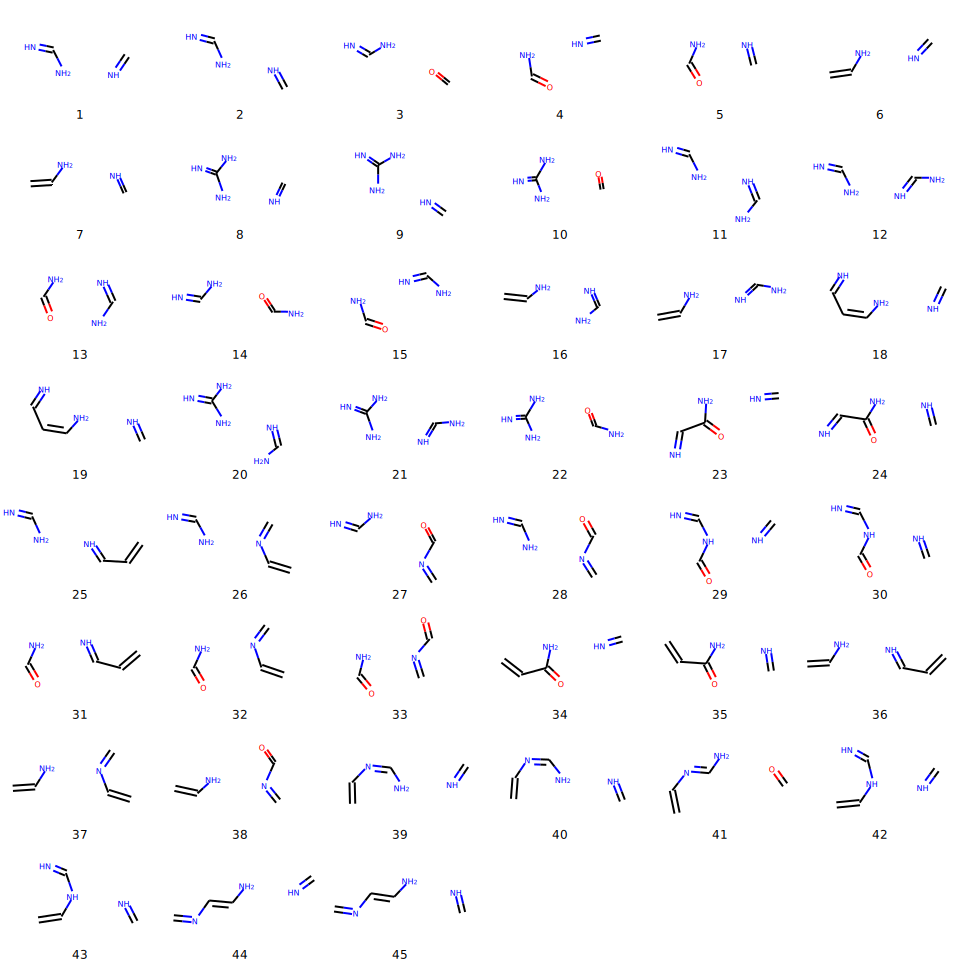

In [534]:
_fst = io2.commandOut('ls ~/amons-paper-db/dna-base/pairs/xtb-1by1/cg.1/e_b3lypvdz/g7raf_vdw/frag_*f')
fst = _fst # [ _fst[ix-1] for ix in [3,4,5,7,14,17,21,22,24] ]
reload(cdc)
cdc.draw_rdkit().viewms(fst, wlgd_text='id', nmr=6, molSize=(160,120), wia=F )

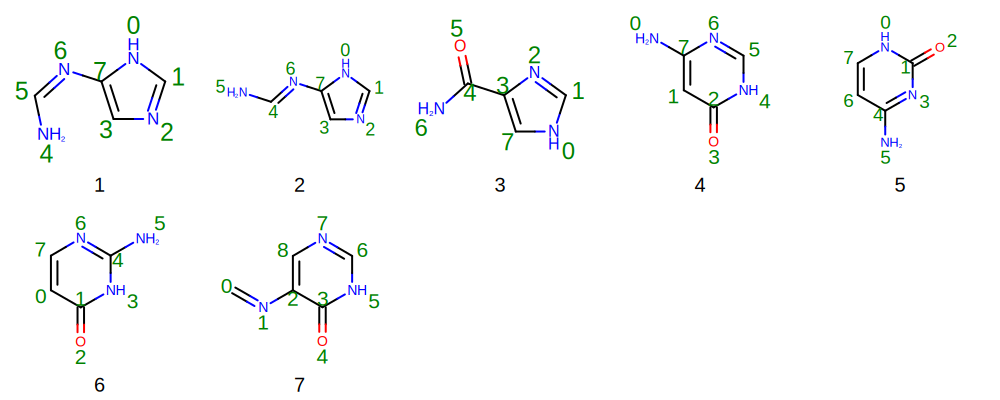

In [517]:
#fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/1by1/04/g9raf/non-planar/f*f')#
#fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/1by1/04/g9raf/frag_2[6-9]*f')
_fst = io2.commandOut('ls /home/bing/amons-paper-db/dna-base/pairs/xtb-1by1/cg.1/g7raf_extl/ni8/frag_*f')
#cdc.draw_rdkit().viewms(_fst, nmr=4, molSize=(200,200), wlgd_text='id')
fst = _fst # [ _fst[ix-1] for ix in [3,4,5,7,14,17,21,22,24] ]
reload(cdc)
cdc.draw_oechem().viewms(fst, wlgd_text='id', nmr=5, molSize=(200,200), wia=T )
#cdc.draw_imol().viewms(fst) #, nmr=4, molSize=(200,200), wlgd_text='id')

In [510]:
objs

['/home/bing/amons-paper-db/dna-base/pairs/xtb/target/AT.sdf']

In [471]:
1 in set([1,2])

True

In [505]:
reload(coo)

i = 0
o1 = coo.StringM(fst[i])

ifdhbd, ihbd, _ = coo.is_subg(o1.oem, coo.sma_hbd, iop=1)
ifdhba, ihba, _ = coo.is_subg(o1.oem, coo.sma_hba, iop=1)



ghb = o1.g_hbonds
gv = o1.gvdw

++ j= 2 zj= 8
 *** j,bj =  2 {2, 27}
++ j= 5 zj= 8
 *** j,bj =  5 {26, 5}
++ j= 23 zj= 1
 *** j,bj =  23 {15, 23}
++ j= 25 zj= 1
 *** j,bj =  25 {25, 11}
++ j= 26 zj= 1
 *** j,bj =  26 {26, 5}
++ j= 27 zj= 1
 *** j,bj =  27 {2, 27}


In [506]:
o1.ncbs

[{2, 27}, {5, 26}, {15, 23}, {11, 25}]

In [503]:
o1.ncbs

[{2, 27}, {5, 26}, {15, 23}, {11, 25}]

In [470]:
np.where( np.triu(gv)>0 )

(array([ 5,  6,  6,  6,  6,  8,  8, 16]),
 array([16,  8, 13, 14, 16, 13, 14, 17]))

In [407]:
cme.Elements().rvdws[ [1,7,8,9]]

array([1.1 , 1.55, 1.52, 1.47])

In [489]:
cme.Elements().rcs[ [1,8]].sum()

0.97

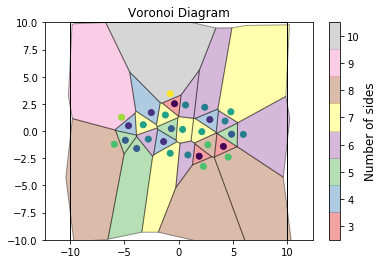

In [425]:
draw_voronoi(box, p, voro.polytopes)

In [409]:
import numpy as np
import freud
import matplotlib
import matplotlib.pyplot as plt

In [424]:
L = 20
box = freud.box.Box.square(L)
voro = freud.voronoi.Voronoi(box, L/2)

p = o1.coords
p[:,2] = 0.0
cells = voro.compute(box=box, positions=p).polytopes
print(cells)


[array([[-4.0025,  1.6469,  0.    ],
       [-3.8712, -0.3712,  0.    ],
       [-5.7983,  0.0536,  0.    ],
       [-5.8677,  0.1067,  0.    ]]), array([[-3.8665, -0.3766,  0.    ],
       [-3.8602, -0.5001,  0.    ],
       [-5.0171, -2.113 ,  0.    ],
       [-5.7983,  0.0536,  0.    ],
       [-3.8712, -0.3712,  0.    ]]), array([[-5.0171, -2.113 ,  0.    ],
       [-6.4996, -9.9427,  0.    ],
       [-3.3808, -9.301 ,  0.    ],
       [-2.3872, -2.3245,  0.    ],
       [-3.8602, -0.5001,  0.    ]]), array([[-3.8665, -0.3766,  0.    ],
       [-1.9762,  0.2906,  0.    ],
       [-1.9182,  0.1635,  0.    ],
       [-2.3   , -2.1897,  0.    ],
       [-2.3872, -2.3245,  0.    ],
       [-3.8602, -0.5001,  0.    ]]), array([[-2.3   , -2.1897,  0.    ],
       [-0.1437, -0.9766,  0.    ],
       [-0.2296, -0.8422,  0.    ],
       [-1.9182,  0.1635,  0.    ]]), array([[-0.2576, -5.2022,  0.    ],
       [-1.8687, -9.3008,  0.    ],
       [-3.3808, -9.301 ,  0.    ],
       [-2.3872, 

In [418]:
def draw_voronoi(box, points, cells, nlist=None, color_by_sides=True):
    ax = plt.gca()
    # Draw Voronoi cells
    patches = [plt.Polygon(cell[:, :2]) for cell in cells]
    patch_collection = matplotlib.collections.PatchCollection(patches, edgecolors='black', alpha=0.4)
    cmap = plt.cm.Set1

    if color_by_sides:
        colors = [len(cell) for cell in voro.polytopes]
    else:
        colors = np.random.permutation(np.arange(len(patches)))

    cmap = plt.cm.get_cmap('Set1', np.unique(colors).size)
    bounds = np.array(range(min(colors), max(colors)+2))

    patch_collection.set_array(np.array(colors))
    patch_collection.set_cmap(cmap)
    patch_collection.set_clim(bounds[0], bounds[-1])
    ax.add_collection(patch_collection)

    # Draw points
    plt.scatter(points[:,0], points[:,1], c=colors)
    plt.title('Voronoi Diagram')
    plt.xlim((-box.Lx/2, box.Lx/2))
    plt.ylim((-box.Ly/2, box.Ly/2))

    # Set equal aspect and draw box
    ax.set_aspect('equal', 'datalim')
    box_patch = plt.Rectangle([-box.Lx/2, -box.Ly/2], box.Lx, box.Ly, alpha=1, fill=None)
    ax.add_patch(box_patch)

    # Draw neighbor lines
    if nlist is not None:
        bonds = np.asarray([points[j] - points[i] for i, j in zip(nlist.index_i, nlist.index_j)])
        box.wrap(bonds)
        line_data = np.asarray([[points[nlist.index_i[i]],
                                 points[nlist.index_i[i]]+bonds[i]] for i in range(len(nlist.index_i))])
        line_data = line_data[:, :, :2]
        line_collection = matplotlib.collections.LineCollection(line_data, alpha=0.3)
        ax.add_collection(line_collection)

    # Show colorbar for number of sides
    if color_by_sides:
        cb = plt.colorbar(patch_collection, ax=ax, ticks=bounds, boundaries=bounds)
        cb.set_ticks(cb.formatter.locs + 0.5)
        cb.set_ticklabels((cb.formatter.locs - 0.5).astype('int'))
        cb.set_label("Number of sides", fontsize=12)
    plt.show()

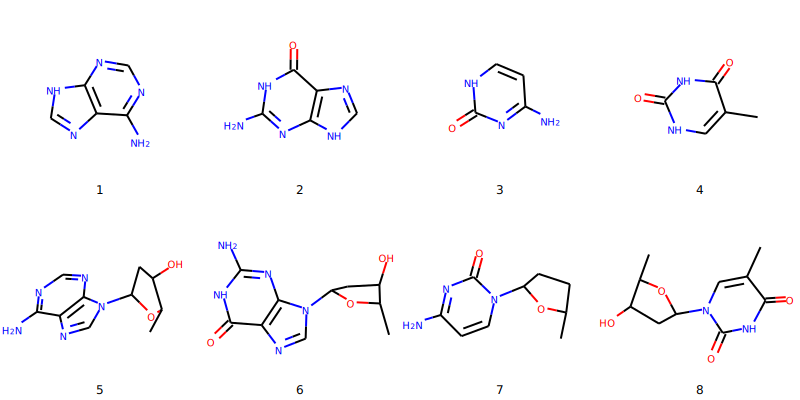

In [180]:
fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/a/target/f*f')
cdc.draw_rdkit().viewms(fst, nmr=4, molSize=(200,200), wlgd_text='id')

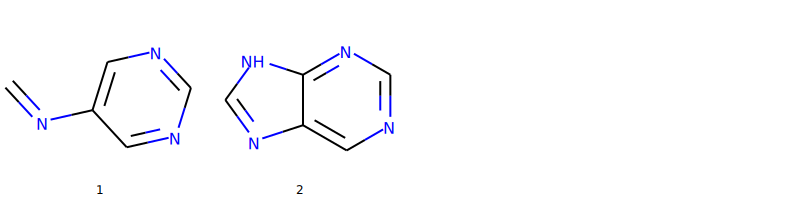

In [267]:
_s2 = """C=Nc1cncnc1
c1c2c([nH]cn2)ncn1"""
ss2 = str2l(_s2)
cdc.draw_rdkit().viewms(ss2, nmr=4, molSize=(200,200), wlgd_text='id')

In [ ]:
~/amons-paper-db/dna-base/monomers/xtb/1by1/05/new

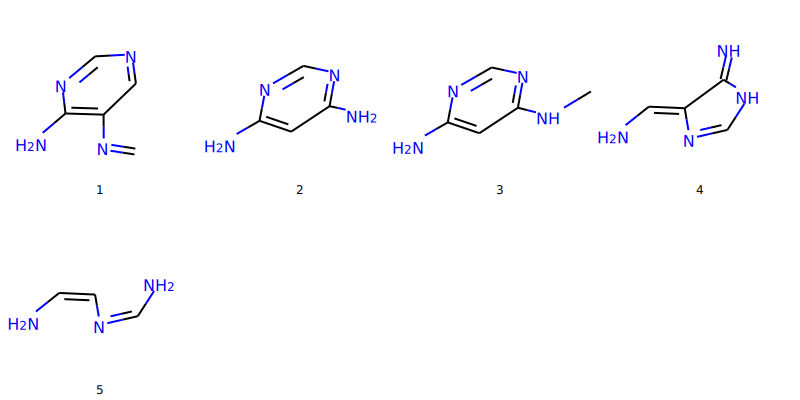

In [269]:
fst = io2.commandOut('ls ~/amons-paper-db/dna-base/monomers/xtb/1by1/05/new/*sdf')
cdc.draw_rdkit().viewms(fst, nmr=4, molSize=(200,200), wlgd_text='id')

In [273]:
w0 = '/home/bing/amons-paper-db/bio/xtb/13a/sub01/g9raf/ni8/'
fst = io2.commandOut('ls %s/target/*sdf'%w0)
#cdc.draw_rdkit().viewms(fst, nmr=4, molSize=(200,200), wlgd_text='id')

In [271]:
w0 = '/home/bing/amons-paper-db/bio/xtb/13a/sub01/g9raf/ni8/'
ipt = 'g7raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (20, 4) zsu= [1 6 7 8]
--llambda,c =  0.01 1.0
  None # rank(ns1)=2 less than len(nzu)=4
     5     123.3579     123.3579     123.3579
     8      14.4475      14.4475      14.4475
    11       2.7116       2.7116       2.7116
    15       2.5842       2.5842       2.5842
    17       2.2073       2.2073       2.2073
    19       1.8794       1.8794       1.8794
    19       1.8794       1.8794       1.8794
    19       1.8794       1.8794       1.8794
--llambda,c =  0.0001 1.0
  None # rank(ns1)=2 less than len(nzu)=4
     5     123.3416     123.3416     123.3416
     8      13.0250      13.0250      13.0250
    11      -0.7615       0.7615      -0.7615
    15       3.9188       3.9188       3.9188
    17       3.1744       3.1744       3.1744
    19       1.8011       1.8011       1.8011
    19       1.8011       1.8011       1.8011
    19       1.8011       1.8011       1.8011
--llambda,c =  1e-08 1.0
  None # rank(ns1)=2 less than len(nzu)=4
     5     123.3414     123.

--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     8      -0.3347       0.3347      -0.3347
     8      -0.3347       0.3347      -0.3347
    12      -0.2189       0.2189      -0.2189
    12      -0.2189       0.2189      -0.2189
    12      -0.2189       0.2189      -0.2189
    12      -0.2189       0.2189      -0.2189
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     8      -0.4390       0.4390      -0.4390
     8      -0.4390       0.4390      -0.4390
    12       0.0083       0.0083       0.0083
    12       0.0083       0.0083       0.0083
    12       0.0083       0.0083       0.0083
    12       0.0083       0.0083       0.0083
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     8      -0.4412       0.4412      -0.4412
     8      -0.4412       0.4412      -0.4412
    12  

--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3      97.1485      97.1485      97.1485
     5      -1.2504       1.2504      -1.2504
     7       0.7242       0.7242       0.7242
    10      -3.9294       3.9294      -3.9294
    12      -2.7631       2.7631      -2.7631
    13      -1.8661       1.8661      -1.8661
    13      -1.8661       1.8661      -1.8661
    13      -1.8661       1.8661      -1.8661
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3      97.1485      97.1485      97.1485
     5      -1.2550       1.2550      -1.2550
     7      -0.2881       0.2881      -0.2881
    10      -3.4271       3.4271      -3.4271
    12      -1.5891       1.5891      -1.5891
    13      -0.3523       0.3523      -0.3523
    13      -0.3523       0.3523      -0.3523
    13      -0.3523       0.3523      -0.3523
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3      97.1485      97.1485      97.1485
     5      -1.25

--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     7       1.5559       1.5559       1.5559
     7       1.5559       1.5559       1.5559
    10      -0.3594       0.3594      -0.3594
    10      -0.3594       0.3594      -0.3594
    10      -0.3594       0.3594      -0.3594
    10      -0.3594       0.3594      -0.3594
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     7       0.6169       0.6169       0.6169
     7       0.6169       0.6169       0.6169
    10      -0.2570       0.2570      -0.2570
    10      -0.2570       0.2570      -0.2570
    10      -0.2570       0.2570      -0.2570
    10      -0.2570       0.2570      -0.2570
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=2 less than len(nzu)=3
  None # rank(ns1)=2 less than len(nzu)=3
     7       0.5917       0.5917       0.5917
     7       0.5917       0.5917       0.5917
    10  

--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
    10      -0.3762       0.3762      -0.3762
    10      -0.3762       0.3762      -0.3762
    14       0.1895       0.1895       0.1895
    14       0.1895       0.1895       0.1895
    14       0.1895       0.1895       0.1895
    14       0.1895       0.1895       0.1895
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
    10      -0.5479       0.5479      -0.5479
    10      -0.5479       0.5479      -0.5479
    14      -0.0457       0.0457      -0.0457
    14      -0.0457       0.0457      -0.0457
    14      -0.0457       0.0457      -0.0457
    14      -0.0457       0.0457      -0.0457
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=3 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
    10      -0.0910       0.0910      -0.0910
    10      -0.0910       0.0910      -0.0910
    14  

--llambda,c =  0.01 1.0
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     6      13.3181      13.3181      13.3181
     7      11.4573      11.4573      11.4573
    11       4.8163       4.8163       4.8163
    12       2.4370       2.4370       2.4370
    13       1.9540       1.9540       1.9540
    13       1.9540       1.9540       1.9540
    13       1.9540       1.9540       1.9540
--llambda,c =  0.0001 1.0
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     6      14.8263      14.8263      14.8263
     7      12.5342      12.5342      12.5342
    11       4.9031       4.9031       4.9031
    12       1.4823       1.4823       1.4823
    13       0.8178       0.8178       0.8178
    13       0.8178       0.8178       0.8178
    13       0.8178       0.8178       0.8178
--llambda,c =  1e-08 1.0
  None # rank(ns1)=2 less than len(nzu)=4
  None # rank(ns1)=3 less than len(nzu)=4
     6      14.8523      14.8

--llambda,c =  0.01 1.0
  None # rank(ns1)=2 less than len(nzu)=3
     5      80.9857      80.9857      80.9857
     6      37.2438      37.2438      37.2438
    11       0.1707       0.1707       0.1707
    13      -2.2345       2.2345      -2.2345
    16      -1.2270       1.2270      -1.2270
    17      -1.1928       1.1928      -1.1928
    17      -1.1928       1.1928      -1.1928
    17      -1.1928       1.1928      -1.1928
--llambda,c =  0.0001 1.0
  None # rank(ns1)=2 less than len(nzu)=3
     5      79.6154      79.6154      79.6154
     6      35.2574      35.2574      35.2574
    11      -3.7620       3.7620      -3.7620
    13      -4.6308       4.6308      -4.6308
    16      -0.4555       0.4555      -0.4555
    17       0.3092       0.3092       0.3092
    17       0.3092       0.3092       0.3092
    17       0.3092       0.3092       0.3092
--llambda,c =  1e-08 1.0
  None # rank(ns1)=2 less than len(nzu)=3
     5      79.6005      79.6005      79.6005
     6      35.23

--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     125.1122     125.1122     125.1122
     5      19.5801      19.5801      19.5801
    11      20.0426      20.0426      20.0426
    19       0.8216       0.8216       0.8216
    23       3.3521       3.3521       3.3521
    25       1.4012       1.4012       1.4012
    25       1.4012       1.4012       1.4012
    25       1.4012       1.4012       1.4012
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     125.1122     125.1122     125.1122
     5      17.5302      17.5302      17.5302
    11      16.4139      16.4139      16.4139
    19       0.9349       0.9349       0.9349
    23       3.0393       3.0393       3.0393
    25       2.1007       2.1007       2.1007
    25       2.1007       2.1007       2.1007
    25       2.1007       2.1007       2.1007
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=3
     3     125.1122     125.1122     125.1122
     5      17.50

In [280]:
errs_a = np.array(obj.maes['1,0'])
idx_a = np.arange(len(errs_a))
idx_l = idx_a[ np.abs(errs_a[:,-1]) > 1.5]
for i in idx_l:
    print(i+1, ['%.2f'%ei for ei in errs_a[i]])

1 ['nan', '123.34', '13.02', '-0.76', '3.92', '3.17', '1.80', '1.80', '1.80']
3 ['nan', '91.72', '-3.86', '-0.25', '-4.11', '-5.43', '-3.57', '-3.57', '-3.57']
5 ['nan', '131.24', '10.50', '4.11', '-2.50', '0.63', '-1.62', '-1.62', '-1.62']
31 ['nan', 'nan', 'nan', '-4.16', '-4.16', '1.80', '1.80', '1.80', '1.80']
48 ['nan', '127.34', '70.27', '6.53', '1.70', '2.43', '1.99', '1.99', '1.99']
50 ['nan', '125.11', '17.53', '16.41', '0.93', '3.04', '2.10', '2.10', '2.10']
51 ['nan', '130.06', '24.15', '14.47', '-1.18', '3.29', '2.72', '2.72', '2.72']
53 ['nan', 'nan', 'nan', '9.89', '9.89', '1.72', '1.72', '1.72', '1.72']


In [285]:
reload(cdc)
fsi = [ fst[i] for i in idx_l ]
cdc.draw_imol().viewms(fsi ) #, nmr=4)

In [304]:
reload(coo)
for i,fi in enumerate(fsi):
    mi = coo.StringM(fi)
    print(i+1,fi.split('/')[-1], mi.resonated) #.aromatic.astype(int))

1 frag_108_c00001.sdf False
2 frag_110_c00001.sdf False
3 frag_112_c00001.sdf False
4 frag_130_c00001.sdf False
5 frag_144_c00001.sdf False
6 frag_146_c00001.sdf False
7 frag_147_c00001.sdf False
8 frag_149_c00001.sdf True


RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [17:43:30] Warning: molecule is tagged as 3D, but all Z coords are zero


In [301]:
coo.StringM('c1c[nH]cc1').aromatic

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [287]:
import aqml.cheminfo.molecule.elements as cme
el = cme.Elements()

In [289]:
el.rvdws[ [1,7,8] ]

array([1.1 , 1.55, 1.52])

In [305]:
' '.join([ fi.split('/')[-1][:-4]+'.xyz' for fi in fsi ])

'frag_108_c00001.xyz frag_110_c00001.xyz frag_112_c00001.xyz frag_130_c00001.xyz frag_144_c00001.xyz frag_146_c00001.xyz frag_147_c00001.xyz frag_149_c00001.xyz'

In [322]:
w0 = '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer/'
ipt = 'g7raf,./,4.8'
obj = glc(w0, ipt)

wds= ['g7raf', './']
_wd= g7raf
_wd= ./
##
i= 1
nzs =  (26, 4) zsu= [1 6 7 8]
--llambda,c =  0.01 1.0
  None # rank(ns1)=2 less than len(nzu)=4
     5     150.5820     150.5820     150.5820
     8      39.4412      39.4412      39.4412
    12      18.5768      18.5768      18.5768
    19       1.0361       1.0361       1.0361
    23       1.5875       1.5875       1.5875
    25       0.9488       0.9488       0.9488
    25       0.9488       0.9488       0.9488
    25       0.9488       0.9488       0.9488
--llambda,c =  0.0001 1.0
  None # rank(ns1)=2 less than len(nzu)=4
     5     150.6875     150.6875     150.6875
     8      29.9110      29.9110      29.9110
    12       9.8845       9.8845       9.8845
    19       3.2186       3.2186       3.2186
    23       2.9174       2.9174       2.9174
    25       1.3459       1.3459       1.3459
    25       1.3459       1.3459       1.3459
    25       1.3459       1.3459       1.3459
--llambda,c =  1e-08 1.0
  None # rank(ns1)=2 less t

--llambda,c =  0.01 1.0
  None # rank(ns1)=1 less than len(nzu)=4
     4     130.0564     130.0564     130.0564
     6      26.7962      26.7962      26.7962
    10      19.8567      19.8567      19.8567
    17      -1.3804       1.3804      -1.3804
    21       2.6473       2.6473       2.6473
    23       1.6512       1.6512       1.6512
    23       1.6512       1.6512       1.6512
    23       1.6512       1.6512       1.6512
--llambda,c =  0.0001 1.0
  None # rank(ns1)=1 less than len(nzu)=4
     4     130.0564     130.0564     130.0564
     6      24.1491      24.1491      24.1491
    10      15.4883      15.4883      15.4883
    17      -1.3706       1.3706      -1.3706
    21       3.4904       3.4904       3.4904
    23       2.7148       2.7148       2.7148
    23       2.7148       2.7148       2.7148
    23       2.7148       2.7148       2.7148
--llambda,c =  1e-08 1.0
  None # rank(ns1)=1 less than len(nzu)=4
     4     130.0564     130.0564     130.0564
     6      24.12

In [323]:
errs_a = np.array(obj.maes['1,0'])
idx_a = np.arange(len(errs_a))
idx_l = idx_a[ np.abs(errs_a[:,-1]) > 1.5]
for i in idx_l:
    print(i+1, ['%.2f'%ei for ei in errs_a[i]])

4 ['nan', '153.11', '27.56', '20.64', '-2.26', '-1.89', '-1.65', '-1.65', '-1.65']
6 ['nan', '127.34', '70.27', '6.68', '1.83', '1.90', '1.83', '1.83', '1.83']
7 ['nan', '125.11', '17.53', '16.96', '0.62', '3.01', '2.10', '2.10', '2.10']
8 ['nan', '130.06', '24.15', '15.49', '-1.37', '3.49', '2.71', '2.71', '2.71']
9 ['nan', '102.80', '20.11', '14.94', '1.67', '2.58', '1.76', '1.76', '1.76']


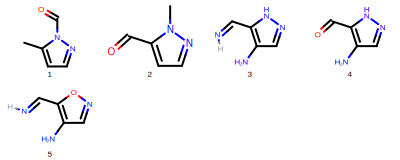

In [326]:
fst = io2.commandOut('ls %s/*sdf'%w0)
fsi = [ fst[i] for i in idx_l ]
fsj = [ fst[j] for j in np.setdiff1d(idx_a, idx_l) ]
cdc.draw_oechem().viewms(fsi, nmr=4, wlgd_text='id')

In [330]:
fst

['/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01_iso01.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01_iso02.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01_iso03.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01_iso04.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01_iso05.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_01.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_02.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//nitro_03.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//oxygen_02.sdf',
 '/home/bing/Dropbox/projects/amons-algo-refine/highly-resonated/xtb/penta/isomer//oxyg

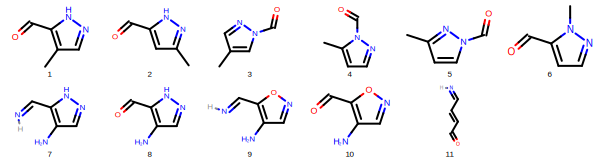

In [329]:
cdc.draw_oechem().viewms(fst, nmr=6, wlgd_text='id')

In [334]:
a = []
b = [ i[0] for i in a ]
a,b

([], [])

In [333]:
printa( errs_a )
#printa( np.array(obj.maes['2,0']) )

[[   nan 150.69  29.91   9.88   3.22   2.92   1.35   1.35   1.35]
 [   nan 151.01  23.42   4.87  -3.     1.14   0.79   0.79   0.79]
 [   nan 153.8   27.77  19.87  -1.47  -1.29  -0.15  -0.15  -0.15]
 [   nan 153.11  27.56  20.64  -2.26  -1.89  -1.65  -1.65  -1.65]
 [   nan 154.72  22.12  18.71  -1.82  -2.12   0.3    0.3    0.3 ]
 [   nan 127.34  70.27   6.68   1.83   1.9    1.83   1.83   1.83]
 [   nan 125.11  17.53  16.96   0.62   3.01   2.1    2.1    2.1 ]
 [   nan 130.06  24.15  15.49  -1.37   3.49   2.71   2.71   2.71]
 [   nan 102.8   20.11  14.94   1.67   2.58   1.76   1.76   1.76]
 [   nan 105.9   18.18   9.94   0.42   1.     1.16   1.16   1.16]]


In [306]:
reload(coo)
for i,f in enumerate(fst):
    o1 = coo.StringM(fst[o])
    print(f.split('/')[-1],o1.resonated)  #aromatic"""

## Linear conjugated chian

In [57]:
w0 = 'CH-linear-conj/'
ipt = 'g8raf,target,4.8'
obj = glc(w0, ipt)

i= 1
nzs =  (5, 2) zsu= [1 6]
--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2       3.2925       3.2925       3.2925
     2       3.2925       3.2925       3.2925
     3       0.1778       0.1778       0.1778
     3       0.1778       0.1778       0.1778
     4       0.0410       0.0410       0.0410
     4       0.0410       0.0410       0.0410
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2       3.2925       3.2925       3.2925
     2       3.2925       3.2925       3.2925
     3       0.0011       0.0011       0.0011
     3       0.0011       0.0011       0.0011
     4       0.0240       0.0240       0.0240
     4       0.0240       0.0240       0.0240
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2       3.2925       3.2925       3.2925
     2       3.2925     

--llambda,c =  0.01 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2      21.5844      21.5844      21.5844
     2      21.5844      21.5844      21.5844
     3       1.7833       1.7833       1.7833
     3       1.7833       1.7833       1.7833
     4       0.1708       0.1708       0.1708
     4       0.1708       0.1708       0.1708
--llambda,c =  0.0001 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2      21.5844      21.5844      21.5844
     2      21.5844      21.5844      21.5844
     3       0.0286       0.0286       0.0286
     3       0.0286       0.0286       0.0286
     4       0.2449       0.2449       0.2449
     4       0.2449       0.2449       0.2449
--llambda,c =  1e-08 1.0
  None
  None # rank(ns1)=1 less than len(nzu)=2
  None # rank(ns1)=1 less than len(nzu)=2
     2      21.5844      21.5844      21.5844
     2      21.5844      21.5844      21.5844
     3  

In [59]:
printa( np.array(obj.maes['1,0']) )

[[  nan   nan   nan  3.29  3.29  0.    0.    0.02  0.02]
 [  nan   nan   nan  5.43  5.43  0.05  0.05  0.1   0.1 ]
 [  nan   nan   nan  7.67  7.67  0.04  0.04  0.12  0.12]
 [  nan   nan   nan  9.97  9.97  0.2   0.2   0.3   0.3 ]
 [  nan   nan   nan 12.28 12.28  0.22  0.22  0.34  0.34]
 [  nan   nan   nan 14.64 14.64  0.22  0.22  0.37  0.37]
 [  nan   nan   nan 16.96 16.96  0.21  0.21  0.39  0.39]
 [  nan   nan   nan 19.26 19.26  0.09  0.09  0.29  0.29]
 [  nan   nan   nan 21.58 21.58  0.03  0.03  0.24  0.24]
 [  nan   nan   nan 23.9  23.9  -0.03 -0.03  0.2   0.2 ]
 [  nan   nan   nan 26.19 26.19 -0.13 -0.13  0.12  0.12]
 [  nan   nan   nan 28.48 28.48 -0.25 -0.25  0.02  0.02]]


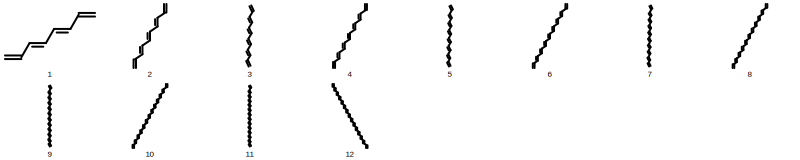

In [60]:
fs = io2.commandOut('ls %s/target/f*f'%w0)
reload(cdc)
cdc.draw_oechem().viewms(fs, wlgd_text='id')

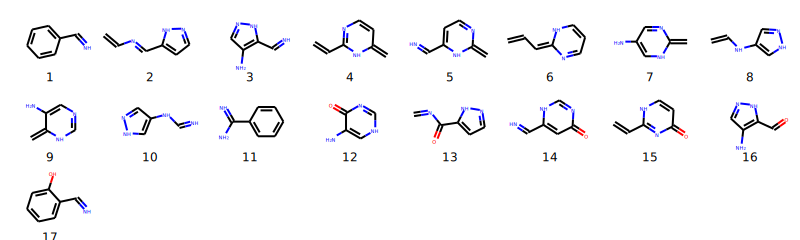

In [164]:
s1 = """c1ccc(cc1)C=N
C=CN=Cc1ccn[nH]1
c1c(c([nH]n1)C=N)N
C=CC1=NC=CC(=C)N1
C=CC1=NC=CC(=C)N1
C=C1NC(=CC=N1)C=N
C=CC=C1NC=CC=N1
C=CC=C1NC=CC=N1
C=C1NC=C(C=N1)N
C=CNc1c[nH]nc1
C=C1C(=CN=CN1)N
c1c(cn[nH]1)NC=N
c1ccc(cc1)C(=N)N
c1c(c(=O)nc[nH]1)N
C=NC(=O)c1ccn[nH]1
c1c([nH]cnc1=O)C=N
C=Cc1[nH]ccc(=O)n1
C=Cc1[nH]ccc(=O)n1
c1c(c([nH]n1)C=O)N
c1ccc(c(c1)C=N)O"""
ss1 = str2l(s1)
cdc.draw_rdkit().viewms(ss1, wlgd_text='id')

In [165]:
reload(coo)
mols = [ coo.StringM(si) for si in ss1 ]
#ars = [ mi.mesomeric_ar for mi in mols ]
ars = [ mi.resonated for mi in mols ]
for i,si in enumerate(ss1):
    if ars[i]: print(i+1, si, 'iar=T')
#print( dict(zip(range(1,len(fs)+1), ars)) )

1 c1ccc(cc1)C=N iar=T
11 c1ccc(cc1)C(=N)N iar=T
17 c1ccc(c(c1)C=N)O iar=T


RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule is tagged as 3D, but all Z coords are zero
RDKit WARNING: [21:55:48] Warning: molecule

In [54]:
import algo.efit as aefit
import aqml.cheminfo.core as cc
import aqml.cheminfo.rw.xyz as rx
import algo.efit as aefit
import aqml.cheminfo.data.atoms as cda
import aqml.cheminfo.molecule.nbody as cmn
import aqml.cheminfo.molecule.core as cmc
from scipy.optimize import least_squares
from scipy.optimize import differential_evolution

reload(cc); reload(rx); reload(cda); reload(cmn); reload(aefit); reload(cmc);

In [55]:

objs = []
nbody = 2; isub = T; 
rpad=T; ivdw=F; icn=T; iconn=T
######
iconj=T; icnb = F #
######
param = rpad, icn, iconn, iconj, icnb, ivdw 
bts = set()
x = []; tpi = []
for im in range(nm):
    oi = aefit.get_mbts_i([mols[im],nbody,isub,param])
    bts.update( list(oi.mbs2.keys()) )
    x.append( oi.mbs2 ); tpi.append( oi.tpsidx )
nbt = len(bts)
print('bts = ', list(bts))
print('n1,n2 = ', n1,nm-n1)

bts =  ['6_3-6_3', '1_1-6_3']
n1,n2 =  9 17


In [56]:
tpi[2]

{'1_1-6_3': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '6_3-6_3': [0.0, 1.0, 0.0]}

In [57]:


#bts, rs = aefit.initb_g(mols[idx1], ivdw=F, iconj=F, icn=F, iconn=T, nproc=1)

#x1 = rs; y1 = ys[idx1]
#nav = int(len(x1[0])/nbt)
#x1_new = x1.reshape((n1,nbt,nav))
x1 = [ x[im] for im in idx1 ]
ys = mols.ys
y1 = ys[idx1]

iext = F # T
nparam = 4 #if iext else 3

def fun(p0):
    param = p0.reshape( (nbt,nparam) )
    es = []
    for i in range(len(x1)):
        ei = 0.
        for j,bt in enumerate(bts):
            #u0, a, b = param[j]
            if bt not in x1[i].keys(): continue
            xij = np.array(x1[i][bt])
            tpi_ij = np.array(tpi[i][bt])
            if iext:
                u0, a, b, c = param[j]
                if bt[-2:] == 'pi':
                    ei += u0 * np.sum( np.exp( -a * xij[xij<16.0]**b ) + c )
                else:
                    #boi = np.exp( - a * (x1_new[i,j,k] - b) )
                    #boi = np.exp( - a * xij[xij<16.0]**b )
                    #ei += u0 * np.sum( np.exp( c*(1-boi**c) ) )
                    ei += np.sum( u0 * ( (np.exp( - a * (xij[xij<16.0] - b) - 1.)**2 - 1.) ) )
            else:
                u0, a, b, c = param[j]
                if bt[-2:] == 'pi':
                    ei += np.sum( u0 * np.exp( -a * (xij[xij<16.0]-b) ) )
                    #ei += np.sum( u0 * (1/xij[xij<16.0]) + a/xij[xij<16.0]**2 + b/xij[xij<16.0]**3 )
                else:
                    #boi = np.exp( - a * (x1_new[i,j,k] - b) )
                    ei += np.sum( u0 * (np.exp( -2.0 *a * (xij[xij<16.0] - b) ) - 2.*(1. + c * tpi_ij[xij<16.0]  ) * np.exp( - a * (xij[xij<16.0] - b) )))
        es.append( ei )
    return np.array(es)

la = 1.e-6
def loss(p0):
    return np.sum( (y1 - fun(p0))**2 ) #+ la * np.sum(np.array(p0)**2)

bounds = []
for i in range(nbt): #-1):
    #if iext:
    bounds += [ [-200.,-1.], [0.0001,10], [0.0001,10], [0.0001,10] ]
    #else:
    #    bounds += [ [-200., -1.], [0.0001,10], [0.0001,10] ]

#bounds += [ [-4000, -1.], [-10,10], [-10,10] ]

# "seed" the numpy random number generator for repeatable results
res = differential_evolution(loss, bounds, seed=1, updating='deferred', workers=os.cpu_count())
param = res.x

dys1 = fun(param) - y1
print('bts=', bts)           
print('param=', param)
print('train: n, mae,rmse,errmax=', len(dys1), np.mean(np.abs(dys1)), np.sqrt(np.mean(dys1*dys1)), np.max(np.abs(dys1)))
print('dys1=', dys1)


bts= {'6_3-6_3', '1_1-6_3'}
param= [-1.6042e+00  9.8898e+00  1.0000e-04  3.6220e+00 -4.7965e+00  2.9946e-01
  7.7011e+00  7.9578e+00]
train: n, mae,rmse,errmax= 9 145.60732596443844 176.14143822054012 272.88721811925325
dys1= [-249.0007 -175.625   -93.0631   -8.7416  272.8872 -163.4423  -81.5387
   -1.9392  264.228 ]


In [58]:

def morse(x, tpi, p0):
    param = p0.reshape( (nbt,nparam) )
    es = []
    for i in range(len(x)):
        ei = 0.
        for j,bt in enumerate(bts):
            #u0, a, b = param[j]
            #print('i,j,bt=',i,j,bt)
            if bt not in x[i].keys(): continue
            xij = np.array(x[i][bt])
            tpi_ij = np.array(tpi[i][bt])
            if iext:
                u0, a, b, c = param[j]
                if bt[-2:] == 'pi':
                    ei += u0 * np.sum( np.exp( -a * xij[xij<16.0]**b ) + c )
                else:
                    #boi = np.exp( - a * (x1_new[i,j,k] - b) )
                    #boi = np.exp( - a * xij[xij<16.0]**b )
                    #ei += u0 * np.sum( np.exp( c*(1-boi**c) ) )
                    ei += np.sum( u0 * ( (np.exp( - a * (xij[xij<16.0] - b) - 1.)**2 - 1.) ) )
            else:
                u0, a, b, c = param[j]
                if bt[-2:] == 'pi':
                    ei += np.sum( u0 * np.exp( -a * (xij[xij<16.0] - b) ) )
                    #ei += np.sum( u0 * np.exp( -a * xij[xij<16.0]**b ) )
                else:
                    #boi = np.exp( - a * (x1_new[i,j,k] - b) )
                    #ei += np.sum( u0 * ( (np.exp( - a * (xij[xij<16.0] - b) - 1.)**2 - 1.) ) )
                    ei+=np.sum(u0*(np.exp(-2.0*a*(xij[xij<16.0]-b))-2.*(1+c*tpi_ij[xij<16.0])*np.exp(-a*(xij[xij<16.0]-b))))
        es.append( ei )
    return np.array(es)

if n2 > 0:
    x2 = [ x[im] for im in idx2 ]; y2 = ys[idx2]
    tpi2 = [ tpi[im] for im in idx2 ]
    dys2 = morse(x2, tpi2, param) - y2
    print('test: n, mae,rmse,errmax=', len(dys2), np.mean(np.abs(dys2)), np.sqrt(np.mean(dys2*dys2)), np.max(np.abs(dys2)))
    print('dys2=',dys2)


test: n, mae,rmse,errmax= 17 2037.2633862496314 2484.7218514991164 7186.921793647402
dys2= [ 330.5657  712.6099 1148.6435 1153.9568 1507.6551 1593.5054 1583.2429
 1594.2283 2017.0978 2027.1989 2034.9364 1946.0049 2450.3389 2383.437
 2297.873  2665.2613 7186.9218]


In [28]:
test: n, mae,rmse,errmax= 10 2.378974553317312 3.933339956162241 11.18179103872535
dys2= [ 2.6349 -0.3386  0.8193  1.0682 -1.7895 -0.5092 -1.0552 -0.382   4.011
 11.1818]

{'1_1-6_3': [0.0, 0.0, 0.0]}

In [1]:
a = {'a':[1,2,], 'b':[3,4,5]}
a.keys(), a.values()

(dict_keys(['a', 'b']), dict_values([[1, 2], [3, 4, 5]]))

In [138]:
param= [-104.526     3.7254    1.4408  -96.137     4.3314    1.5296  -38.6976
    1.3489    0.4432]
mae,rmse,errmax= 3.930454079261551 4.6730715851109785 6.579598382976656


param= [-92.6268   3.5169   1.4706 -40.9839   4.2438   1.7377 -47.079    2.4076
   1.1879]
train: mae,rmse,errmax= 3.8879370035832985 4.614598818738329 6.206941897062961
test: mae,rmse,errmax= 60.86541435901205 76.72692925709045 229.52499469034774
    
param= [ 108.9881    2.4522    7.4539    4.1137 -182.255     2.9178    0.6124
    2.1576  130.8078    1.9499    3.9004    6.0952]
train: mae,rmse,errmax= 0.8700272376607548 1.1817285594483495 1.954421316561593
test: mae,rmse,errmax= 7.844742499508036 11.766009699990601 9.832967804291911


AttributeError: 'tuple' object has no attribute 'reshape'

In [70]:

reload(aefit)
#fp = aqml.get_param(mols, n2=2, idxsr=[], icn=T, iconn=T, iconj=F, cs=cs, cs3=cs3, check_boundary=F)
icn=T; iconn=T; iconj=T #F

nm = _mols.nm; n1 = len(_fs1); n2 = len(_fs2)
ims1 = np.arange(n1)
ims2 = np.arange(n1,nm)
ims = np.concatenate((ims1,ims2)).astype(np.int)
mols = _mols #[ims]
mols.ys = _mols.ys[ims]
reg = aefit.fmorse(mols)
bts, xs = aefit.initb_g(mols, rpad=T, nbody=2, ival=T, icn=icn, iconn=iconn, iconj=iconj, )[:2]


bonds          : nbt,  bts = 3 ['1_1-6_3', '6_3-6_3-pi', '6_3-6_3-sigma']
angles         : nat,  ats = 0 []
dihedral_angles: ndat, dats= 0 []


In [112]:
dys1, dys2, esa_base = mols.calc_ae_dressed(n1)
reg.get_errors(dys1, 'training')
reg.get_errors(dys2, 'test')

 training: n=     9, mae=     17.3560, rmse=     17.9832, errmax=     27.1780
 test: n=    17, mae=     23.4044, rmse=     24.8660, errmax=     33.4447


(23.40440209172513, 24.866044285570464, 33.4447476507994)

In [109]:
param = np.array([ -100.0, 1.08, 1.01, -154., 2.0, 1.33 ])

reg._x = xs #1
reg.morse_g(param)

array([  -4.7401,   -7.5513,  -20.3037,  -31.5776,  -29.705 ,  -13.5598,
        -24.0883,  -34.6879,  -39.5513,  -52.7446,  -58.2169,  -87.5888,
        -86.7136, -102.4754, -115.8591, -117.0403, -115.3411, -145.9638,
       -144.8381, -143.462 , -131.5244, -175.4787, -160.818 , -148.134 ,
       -161.8341, -393.9543])

In [76]:
reload(aefit)
N = len(bts)
reg.prepare_vars(ims1, N, xs)
itest = F
if n2>0: itest = T
#param = reg.regressor_lsq() #ga(nproc=1, seed=3, iext=F)
param = reg.regressor_ga(nproc=1, seed=3, iext=F)
print('param = ', param)

 training: n=     9, mae=      7.9421, rmse=     10.2459, errmax=     18.9945
  test: n=    17, mae=     69.8051, rmse=     80.5694, errmax=    212.0802
param =  [-95.6128   9.       0.5     -1.2749   0.1776   0.5    -29.7403   1.3953
   2.1987]


In [72]:
reload(aefit)
N = len(bts)
reg.prepare_vars(ims1, N, xs)
itest = F
if n2>0: itest = T
#param = reg.regressor_ga(nproc=1, iext=F)
param = reg.regressor_ga(iext=T, seed=3)
print('param = ', param)

 training: n=     9, mae=   1074.4497, rmse=   1159.3985, errmax=   1616.4223
  test: n=    17, mae=   4207.1312, rmse=   4572.3039, errmax=  10306.7172
param =  [1.7020e+00 8.6287e-01 1.0000e-03 8.6294e-01 2.3933e+00 4.3728e-01
 5.4990e-01 5.2452e-01 1.0000e+00 5.8695e+00 1.0000e-03 5.8715e+00]


In [105]:
cs = [ [100,150], [2.,3.], [1.09, 1.4] ]; cs3 = None 
fp = aqml.get_param(mols, n2=2, idxsr=[], icn=T, iconn=T, iconj=F, cs=cs, cs3=cs3, check_boundary=F)

bts =  ['1_1-6_3', '6_3-6_3']
 regress: n1,mae,rmse,errmax=     9     0.5063    0.5495    0.7464
   test: n2,mae,rmse,errmax=     2    3.0564    3.1593    3.8560


In [109]:
bts, param, dys = fp
dic = {}
for i in range(len(bts)):
    dic[bts[i]] = [ param['%s_%d'%(k,i+1)].value for k in ['a','b','c']]
dic

{'1_1-6_3': [108.58353028312663, 32.20932509657754, 1.0847243694057884],
 '6_3-6_3': [133.38236427615635, 3.9740322247414017, 1.3097902576628873]}

In [107]:
fp[2]

array([-0.1266, -0.7464,  0.6277,  0.6726,  0.208 , -0.6133, -0.3299,
       -0.543 ,  0.6893,  2.2569,  3.856 ])

In [43]:
fp = aqml.get_param(mols, n2=3, idxsr=[], icn=T, iconn=T, iconj=F, check_boundary=F)

bts =  ['1_1-6_3', '6_3-6_3']
 ** warning: some optimized params reached boundary values!!
 regress: n1,mae,rmse,errmax=     8     0.3839    0.4573    0.8912
   test: n2,mae,rmse,errmax=     3    2.0097    2.0664    2.6822


In [14]:
import aqml.cheminfo.molecule.nbody as mbd
import aqml.cheminfo.core as cc

In [100]:
oms = []
for f in fs:
    m = cc.molecule(f)
    rawm = cmc.RawMol(m) 
    om = mbd.NBody(rawm, g=rawm.g, iconn=T, icn=T, iconj=F)
    om.get_all(2)
    oms.append(om)

list_2bds = lambda i,k: print(i, np.unique([ '%.2f'%di for di in oms[i].mbs2[k] ]))

In [101]:
k = '6_3-6_3'
for i in range(len(oms)): list_2bds(i,k)

0 ['1.35' '1.36' '1.46']
1 ['1.40']
2 ['1.38' '1.41' '1.42' '1.43']
3 ['1.37' '1.40' '1.42' '1.43' '1.45']
4 ['1.36' '1.38' '1.41' '1.43' '1.45']
5 ['1.36' '1.39' '1.40' '1.42' '1.43']
6 ['1.38' '1.40' '1.41' '1.42' '1.46']
7 ['1.37' '1.39' '1.41' '1.43' '1.45']
8 ['1.36' '1.38' '1.41' '1.42' '1.43' '1.45']
9 ['1.37' '1.42']
10 ['1.36' '1.40' '1.42' '1.43']


In [102]:
k = '1_1-6_3'
for i in range(len(oms)): list_2bds(i,k)

0 ['1.09']
1 ['1.09']
2 ['1.09']
3 ['1.09']
4 ['1.08' '1.09']
5 ['1.09']
6 ['1.08' '1.09']
7 ['1.09']
8 ['1.08' '1.09']
9 ['1.09']
10 ['1.09']


In [ ]:
import algo.qml as aqml
reload(aqml)

meth = 'b3lypvtz'; cwd = 'conj/Ph_OH_CO/'
wds = [cwd+'g7_%s/'%meth, cwd+'target_%s'%meth]

idxsr = []
obj = aqml.qml(wds, n2=3, fitmorse=T, property_names=[meth], iae=T, \
               idxsr=idxsr, check_boundary=F)
obj.test_targets(wds[0]+'map.pkl', llambdas=[1e-2, 1e-4, 1e-8])